In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/drive/MyDrive/CODING DOJO/Códigos/Semana 6/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#Dividir la base
X = df.loc[:, df.columns != 'price']
X=X.drop(columns='date')

In [8]:
X.shape

(21613, 19)

In [9]:
y = df.loc[:, 'price'].values

In [27]:
#Dividir train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [16]:
estimator_range = [1] + list(range(10, 50, 10))
estimator_range

[1, 10, 20, 30, 40]

In [17]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
# Use la división entrenamiento prueba con cada valor de n_estimators (Advertencia: ¡Lento!)
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator,
                                 random_state=3,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

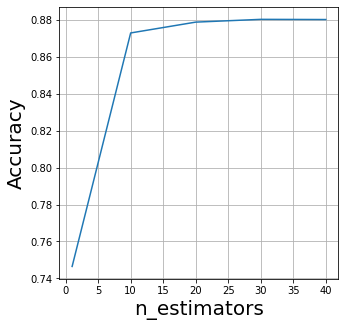

In [28]:
#Gráfico para analizar cual es el mejor n_estimator
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

In [29]:
#Sin bootstrap
forest=RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=20)
forest.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestRegressor(n_estimators=20, n_jobs=2, oob_score=True)

In [21]:
df['rforest_pred']=forest.oob_prediction_
df[['rforest_pred','price']]

,rforest_pred,price
0,267850.000000,221900.0
1,486333.333333,538000.0
2,279779.487179,180000.0
3,441110.000000,604000.0
4,583000.000000,510000.0
...,...,...
21608,385142.857143,360000.0
21609,415122.500000,400000.0
21610,338892.714286,402101.0
21611,419700.000000,400000.0


Bootstrap (Analizar otros parámetros)

In [25]:
forest2=RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=30,bootstrap=True )
forest2.fit(X,y)

RandomForestRegressor(n_estimators=30, n_jobs=2, oob_score=True)

In [26]:
df['rforest_pred_bootstrap']=forest2.oob_prediction_
df[['rforest_pred_bootstrap','price']]

,rforest_pred_bootstrap,price
0,230212.888889,221900.0
1,462370.833333,538000.0
2,293827.083333,180000.0
3,455119.714286,604000.0
4,513476.875000,510000.0
...,...,...
21608,378050.000000,360000.0
21609,425828.583333,400000.0
21610,336655.642857,402101.0
21611,382125.000000,400000.0
